In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Importing data

In [79]:
data=pd.read_csv(r'/content/HR dataset.csv')

In [80]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


There are 35 columns and 1470 rows in this dataset. The columns refer to the attributes such as Age, Attrition, Department, Education, etc. For several attributes such as Education, each datapoint is a representative for description as follows:

Education: 
'Below College'
'College'
'Bachelor'
'Master'
'Doctor'


EnvironmentSatisfaction:
'Low'
'Medium'
'High'
'Very High'


JobInvolvement:
'Low'
'Medium'
'High'
'Very High'


JobSatisfaction:
'Low'
'Medium'
'High'
'Very High'


PerformanceRating:
'Low'
'Good'
'Excellent'
'Outstanding'


RelationshipSatisfaction:
'Low'
'Medium'
'High'
'Very High'


WorkLifeBalance:
'Bad'
'Good'
'Better'
'Best'

The detail of the data types of those attributes can be viewed below

# Data Preprocessing 

In [81]:
data.isna().sum() #searching for null values

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [82]:
Attrition_mapping = {"Yes": 1, "No": 0}
data['Attrition'] = data['Attrition'].map(Attrition_mapping) #to make numerical calculations of attrition rate

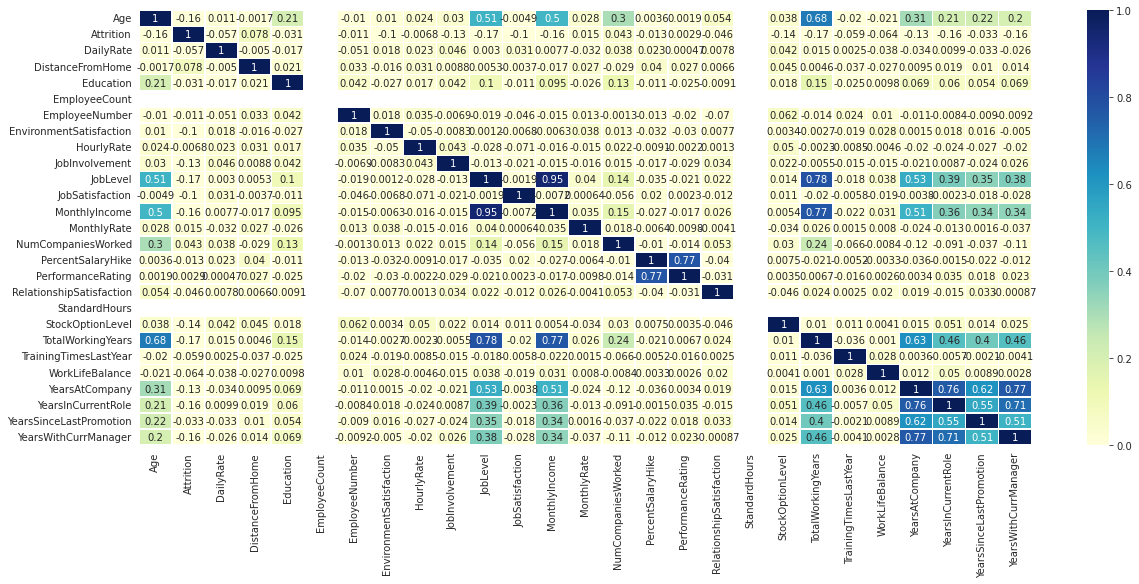

In [84]:
# Data Correlation
corrmatrix = data.corr()
plt.subplots(figsize=(20,8))
sns.heatmap(corrmatrix, vmin=0, vmax=1, annot=True, cmap='YlGnBu',linewidths=0.5)

In [85]:
data.nunique()

Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              1470
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBa

In [86]:
data= data.drop(['DailyRate', 'EmployeeNumber', 'HourlyRate'], axis=1) #dropping irrevelant columns 

In [87]:
data= data.drop(['Over18', 'StandardHours','EmployeeCount'], axis=1) #Dropping columns with only one value

In [88]:
data= data.drop(["PerformanceRating"], axis=1) #Dropping performance rating column too since it's a dependent variable.

In [89]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   int64 
 2   BusinessTravel            1470 non-null   object
 3   Department                1470 non-null   object
 4   DistanceFromHome          1470 non-null   int64 
 5   Education                 1470 non-null   int64 
 6   EducationField            1470 non-null   object
 7   EnvironmentSatisfaction   1470 non-null   int64 
 8   Gender                    1470 non-null   object
 9   JobInvolvement            1470 non-null   int64 
 10  JobLevel                  1470 non-null   int64 
 11  JobRole                   1470 non-null   object
 12  JobSatisfaction           1470 non-null   int64 
 13  MaritalStatus             1470 non-null   object
 14  MonthlyIncome           

In [13]:
data.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,...,PercentSalaryHike,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,Sales,1,2,Life Sciences,2,Female,3,...,11,1,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,Research & Development,8,1,Life Sciences,3,Male,2,...,23,4,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,Research & Development,2,2,Other,4,Male,2,...,15,2,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,Research & Development,3,4,Life Sciences,4,Female,3,...,11,3,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,Research & Development,2,1,Medical,1,Male,3,...,12,4,1,6,3,3,2,2,2,2


# Exploratory Data Analyses

In [90]:
data.describe()

,Age,Attrition,DistanceFromHome,Education,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,...,PercentSalaryHike,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,0.161224,9.192517,2.912925,2.721769,2.729932,2.063946,2.728571,6502.931293,14313.103401,...,15.209524,2.712245,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,0.367863,8.106864,1.024165,1.093082,0.711561,1.106940,1.102846,4707.956783,7117.786044,...,3.659938,1.081209,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,...,11.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,0.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,...,12.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,0.000000,7.000000,3.000000,3.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,...,14.000000,3.000000,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,0.000000,14.000000,4.000000,4.000000,3.000000,3.000000,4.000000,8379.000000,20461.500000,...,18.000000,4.000000,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1.000000,29.000000,5.000000,4.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,...,25.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [15]:
data[data['Attrition'] == 1].describe() #employees left

,Age,Attrition,DistanceFromHome,Education,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,...,PercentSalaryHike,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,237.000000,237.0,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,...,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000
mean,33.607595,1.0,10.632911,2.839662,2.464135,2.518987,1.637131,2.468354,4787.092827,14559.308017,...,15.097046,2.599156,0.527426,8.244726,2.624473,2.658228,5.130802,2.902954,1.945148,2.852321
std,9.689350,0.0,8.452525,1.008244,1.169791,0.773405,0.940594,1.118058,3640.210367,7208.153264,...,3.770294,1.125437,0.856361,7.169204,1.254784,0.816453,5.949984,3.174827,3.153077,3.143349
min,18.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1009.000000,2326.000000,...,11.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,28.000000,1.0,3.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2373.000000,8870.000000,...,12.000000,2.000000,0.000000,3.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000
50%,32.000000,1.0,9.000000,3.000000,3.000000,3.000000,1.000000,3.000000,3202.000000,14618.000000,...,14.000000,3.000000,0.000000,7.000000,2.000000,3.000000,3.000000,2.000000,1.000000,2.000000
75%,39.000000,1.0,17.000000,4.000000,4.000000,3.000000,2.000000,3.000000,5916.000000,21081.000000,...,17.000000,4.000000,1.000000,10.000000,3.000000,3.000000,7.000000,4.000000,2.000000,5.000000
max,58.000000,1.0,29.000000,5.000000,4.000000,4.000000,5.000000,4.000000,19859.000000,26999.000000,...,25.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,15.000000,15.000000,14.000000


In [16]:
data[data['Attrition'] == 0].describe()

,Age,Attrition,DistanceFromHome,Education,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,...,PercentSalaryHike,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1233.000000,1233.0,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,...,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000
mean,37.561233,0.0,8.915653,2.927007,2.771290,2.770479,2.145985,2.778589,6832.739659,14265.779400,...,15.231144,2.733982,0.845093,11.862936,2.832928,2.781022,7.369019,4.484185,2.234388,4.367397
std,8.888360,0.0,8.012633,1.027002,1.071132,0.692050,1.117933,1.093277,4818.208001,7102.260749,...,3.639511,1.071603,0.841985,7.760719,1.293585,0.681907,6.096298,3.649402,3.234762,3.594116
min,18.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1051.000000,2094.000000,...,11.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,31.000000,0.0,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000,3211.000000,7973.000000,...,12.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,0.0,7.000000,3.000000,3.000000,3.000000,2.000000,3.000000,5204.000000,14120.000000,...,14.000000,3.000000,1.000000,10.000000,3.000000,3.000000,6.000000,3.000000,1.000000,3.000000
75%,43.000000,0.0,13.000000,4.000000,4.000000,3.000000,3.000000,4.000000,8834.000000,20364.000000,...,18.000000,4.000000,1.000000,16.000000,3.000000,3.000000,10.000000,7.000000,3.000000,7.000000
max,60.000000,0.0,29.000000,5.000000,4.000000,4.000000,5.000000,4.000000,19999.000000,26997.000000,...,25.000000,4.000000,3.000000,38.000000,6.000000,4.000000,37.000000,18.000000,15.000000,17.000000


From the above data description function we can see that attrition rate is more among employees with certain characteristics given below,

1.Employees who left are at the age of 33

2.Distance from home to work is about 10km

3.Less satisfication in job

4.Monthly income is less

5.Overime working

6.Mostly new to the company

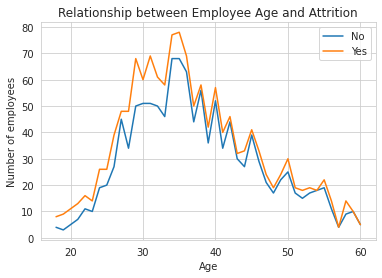

In [91]:
# Plot showing relationship between employee age and attrition
df= data.groupby(['Age','Attrition']).size().unstack()
df.plot(kind='line', stacked=True)
plt.ylabel("Number of employees")
plt.title('Relationship between Employee Age and Attrition')
plt.legend(["No" , "Yes"])
plt.show()

In [18]:
# BusinessTravel and attrition rate
data[['BusinessTravel', 'Attrition']].groupby(['BusinessTravel'], as_index=False).mean().sort_values(by='Attrition', ascending=False)

,BusinessTravel,Attrition
1,Travel_Frequently,0.249097
2,Travel_Rarely,0.149569
0,Non-Travel,0.080000


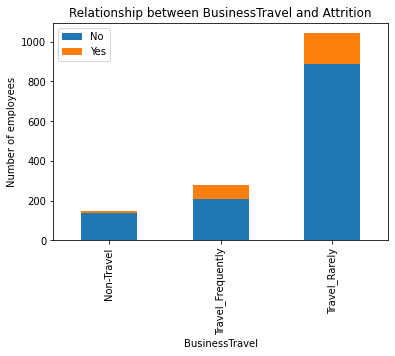

In [19]:
# Plot showing relationship between BusinessTravel and attrition

df= data.groupby(['BusinessTravel','Attrition']).size().unstack()
df.plot(kind='bar', stacked=True)
plt.ylabel("Number of employees")
plt.title('Relationship between BusinessTravel and Attrition')
plt.legend(["No" , "Yes"])
plt.show()

In [20]:
# Department and attrition rate
data[['Department', 'Attrition']].groupby(['Department'], as_index=False).mean().sort_values(by='Attrition')

,Department,Attrition
1,Research & Development,0.138398
0,Human Resources,0.190476
2,Sales,0.206278


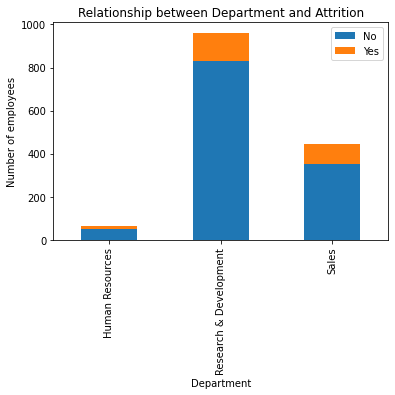

In [21]:
# Plot showing relationship between Department and attrition

df3= data.groupby(['Department','Attrition']).size().unstack()
df3.plot(kind='bar', stacked=True)
plt.ylabel("Number of employees")
plt.title('Relationship between Department and Attrition')
plt.legend(["No" , "Yes"])
plt.show()

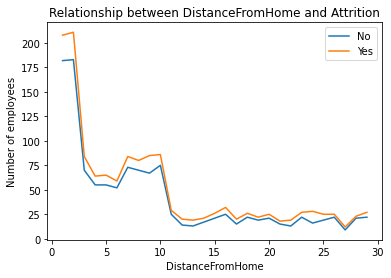

In [22]:
# Plot showing relationship between DistanceFromHome and attrition

df= data.groupby(['DistanceFromHome','Attrition']).size().unstack()
df.plot(kind='line', stacked=True)
plt.ylabel("Number of employees")
plt.title('Relationship between DistanceFromHome and Attrition')
plt.legend(["No" , "Yes"])
plt.show()

In [23]:
# Education and attrition
data[['Education', 'Attrition']].groupby(['Education'], as_index=False).mean().sort_values(by='Attrition', ascending=False)

,Education,Attrition
0,1,0.182353
2,3,0.173077
1,2,0.156028
3,4,0.145729
4,5,0.104167


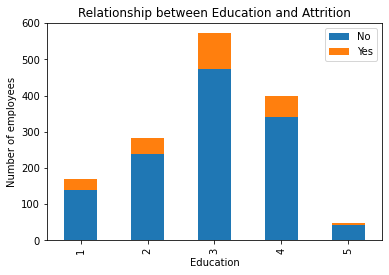

In [24]:
# Plot showing relationship between Education and attrition

df= data.groupby(['Education','Attrition']).size().unstack()
df.plot(kind='bar', stacked=True)
plt.ylabel("Number of employees")
plt.title('Relationship between Education and Attrition')
plt.legend(["No" , "Yes"])
plt.show()

In [25]:
# EducationField and attrition
data[['EducationField', 'Attrition']].groupby(['EducationField'], as_index=False).mean().sort_values(by='Attrition', ascending=False)

,EducationField,Attrition
0,Human Resources,0.259259
5,Technical Degree,0.242424
2,Marketing,0.220126
1,Life Sciences,0.146865
3,Medical,0.135776
4,Other,0.134146


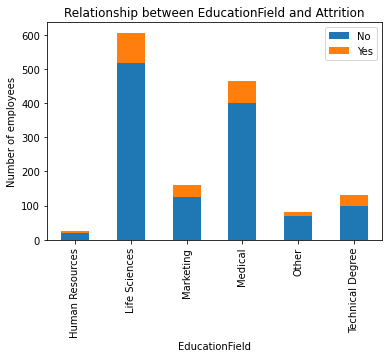

In [26]:
# Plot showing relationship between EducationField and attrition

df= data.groupby(['EducationField','Attrition']).size().unstack()
df.plot(kind='bar', stacked=True)
plt.ylabel("Number of employees")
plt.title('Relationship between EducationField and Attrition')
plt.legend(["No" , "Yes"])
plt.show()

In [27]:
# EnvironmentSatisfaction and attrition
data[['EnvironmentSatisfaction', 'Attrition']].groupby(['EnvironmentSatisfaction'], as_index=False).mean().sort_values(by='Attrition', ascending=False)

,EnvironmentSatisfaction,Attrition
0,1,0.253521
1,2,0.149826
2,3,0.136865
3,4,0.134529


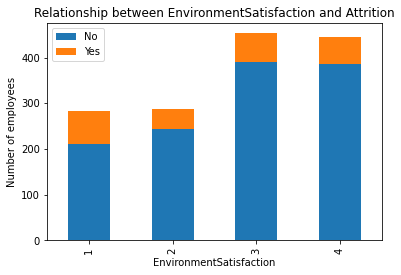

In [28]:
# Plot showing relationship between EnvironmentSatisfaction and attrition

df= data.groupby(['EnvironmentSatisfaction','Attrition']).size().unstack()
df.plot(kind='bar', stacked=True)
plt.ylabel("Number of employees")
plt.title('Relationship between EnvironmentSatisfaction and Attrition')
plt.legend(["No" , "Yes"])
plt.show()

In [29]:
# Gender and attrition
data[['Gender', 'Attrition']].groupby(['Gender'], as_index=False).mean().sort_values(by='Attrition', ascending=False)

,Gender,Attrition
1,Male,0.170068
0,Female,0.147959


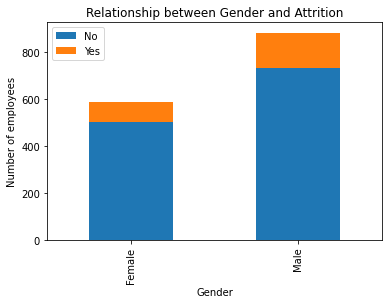

In [30]:

# Plot showing relationship between Gender and attrition

df= data.groupby(['Gender','Attrition']).size().unstack()
df.plot(kind='bar', stacked=True)
plt.ylabel("Number of employees")
plt.title('Relationship between Gender and Attrition')
plt.legend(["No" , "Yes"])
plt.show()

In [31]:
# JobInvolvement and attrition
data[['JobInvolvement', 'Attrition']].groupby(['JobInvolvement'], as_index=False).mean().sort_values(by='Attrition', ascending=False)

,JobInvolvement,Attrition
0,1,0.337349
1,2,0.189333
2,3,0.144009
3,4,0.090278


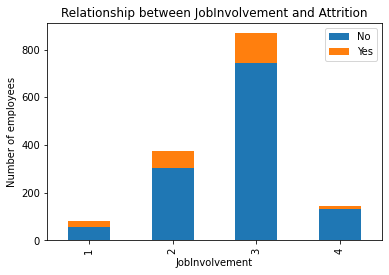

In [32]:

# Plot showing relationship between JobInvolvement and attrition

df= data.groupby(['JobInvolvement','Attrition']).size().unstack()
df.plot(kind='bar', stacked=True)
plt.ylabel("Number of employees")
plt.title('Relationship between JobInvolvement and Attrition')
plt.legend(["No" , "Yes"])
plt.show()

In [33]:
# JobLevel and attrition
data[['JobLevel', 'Attrition']].groupby(['JobLevel'], as_index=False).mean().sort_values(by='Attrition', ascending=False)

,JobLevel,Attrition
0,1,0.263352
2,3,0.146789
1,2,0.097378
4,5,0.072464
3,4,0.047170


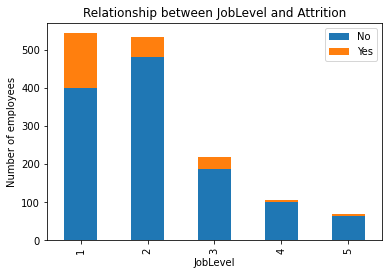

In [34]:

# Plot showing relationship between JobLevel and attrition

df= data.groupby(['JobLevel','Attrition']).size().unstack()
df.plot(kind='bar', stacked=True)
plt.ylabel("Number of employees")
plt.title('Relationship between JobLevel and Attrition')
plt.legend(["No" , "Yes"])
plt.show()

In [35]:
#Attrition rates per Job role
data[['JobRole', 'Attrition']].groupby(['JobRole'], as_index=False).mean().sort_values(by='Attrition', ascending=False)

,JobRole,Attrition
8,Sales Representative,0.397590
2,Laboratory Technician,0.239382
1,Human Resources,0.230769
7,Sales Executive,0.174847
6,Research Scientist,0.160959
4,Manufacturing Director,0.068966
0,Healthcare Representative,0.068702
3,Manager,0.049020
5,Research Director,0.025000


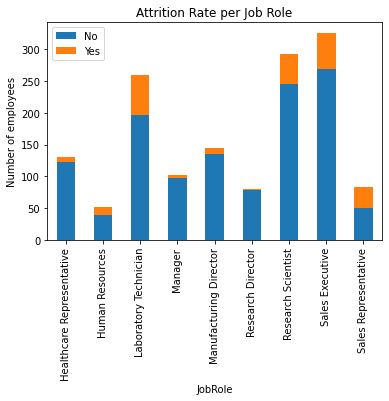

In [36]:
# Attrition rates per Job role
df= data.groupby(['JobRole','Attrition']).size().unstack()
df.plot(kind='bar', stacked=True)
plt.title("Attrition Rate per Job Role")
plt.ylabel("Number of employees")
plt.legend(["No" , "Yes"])
plt.show()

In [37]:
# Attrition Rates grouped according to Job Satisfaction Categories of Employees
data[['JobSatisfaction', 'Attrition']].groupby(['JobSatisfaction'], as_index=False).mean().sort_values(by='Attrition', ascending=False)

,JobSatisfaction,Attrition
0,1,0.228374
2,3,0.165158
1,2,0.164286
3,4,0.113290


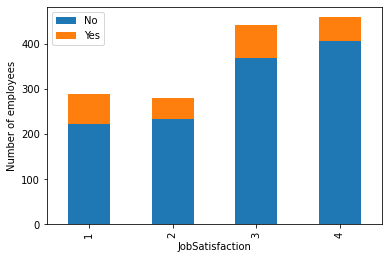

In [38]:
# Attrition Rates grouped according to Job Satisfaction Categories of Employees
df= data.groupby(['JobSatisfaction','Attrition']).size().unstack()
df.plot(kind='bar', stacked=True)
plt.ylabel("Number of employees")
plt.legend(["No" , "Yes"])
plt.show()

In [39]:
# Attrition Rates grouped according to Marital status of Employees
data[['MaritalStatus', 'Attrition']].groupby(['MaritalStatus'], as_index=False).mean().sort_values(by='Attrition', ascending=False)

,MaritalStatus,Attrition
2,Single,0.255319
1,Married,0.124814
0,Divorced,0.100917


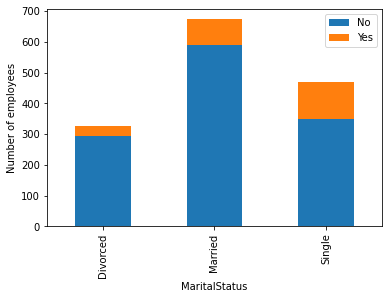

In [40]:
# Attrition Rates grouped according to Marital status of Employees
df= data.groupby(['MaritalStatus','Attrition']).size().unstack()
df.plot(kind='bar', stacked=True)
plt.ylabel("Number of employees")
plt.legend(["No" , "Yes"])
plt.show()

In [41]:
# Attrition Rates grouped according to Overtime Categories 
data[['OverTime', 'Attrition']].groupby(['OverTime'], as_index=False).mean().sort_values(by='Attrition', ascending=False)# Attrition Rates grouped according to Overtime Categories 

,OverTime,Attrition
1,Yes,0.305288
0,No,0.104364


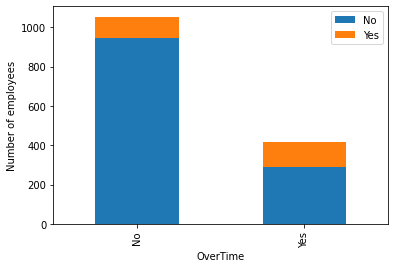

In [42]:
# Attrition Rates grouped according to Overtime Categories 

df= data.groupby(['OverTime','Attrition']).size().unstack()
df.plot(kind='bar', stacked=True)
plt.ylabel("Number of employees")
plt.legend(["No" , "Yes"])
plt.show()

In [43]:
#  Attrition Rates grouped according to Prior Number of Companies that employees had Worked
data[['NumCompaniesWorked', 'Attrition']].groupby(['NumCompaniesWorked'], as_index=False).mean().sort_values(by='Attrition', ascending=False)

,NumCompaniesWorked,Attrition
5,5,0.253968
9,9,0.230769
7,7,0.229730
6,6,0.228571
1,1,0.188100
8,8,0.122449
4,4,0.122302
0,0,0.116751
2,2,0.109589
3,3,0.100629


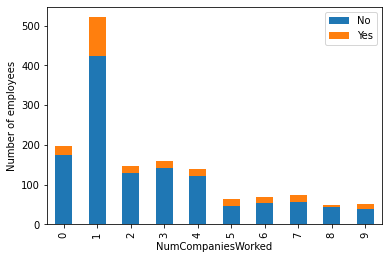

In [44]:
# Attrition Rates grouped according to Prior Number of Companies that employees had Worked
df= data.groupby(['NumCompaniesWorked','Attrition']).size().unstack()
df.plot(kind='bar', stacked=True)
plt.ylabel("Number of employees")
plt.legend(["No" , "Yes"])
plt.show()

In [45]:
data[['RelationshipSatisfaction', 'Attrition']].groupby(['RelationshipSatisfaction'], as_index=False).mean().sort_values(by='Attrition', ascending=False)

,RelationshipSatisfaction,Attrition
0,1,0.206522
2,3,0.154684
1,2,0.148515
3,4,0.148148


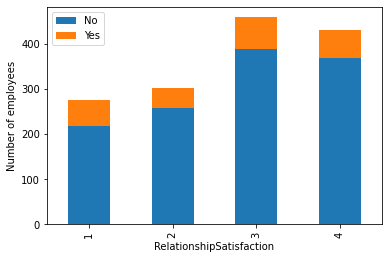

In [46]:
# Attrition Rates Grouped according to levels of Relationship Satisfaction of employees with the company.
df= data.groupby(['RelationshipSatisfaction','Attrition']).size().unstack()
df.plot(kind='bar', stacked=True)
plt.ylabel("Number of employees")
plt.legend(["No" , "Yes"])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


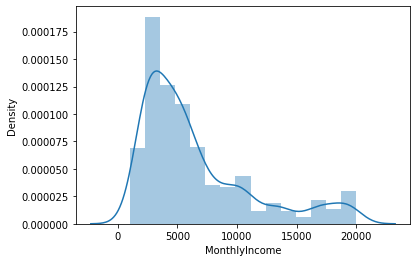

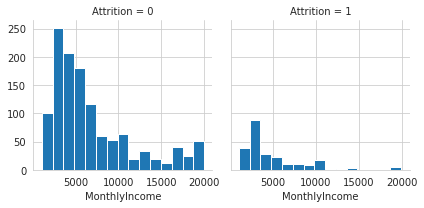

In [47]:
# Attrition plotted against Monthly income of employees
sns.distplot(data['MonthlyIncome'], bins = 15)
sns.set_style('whitegrid')
g = sns.FacetGrid(data, col='Attrition')
g.map(plt.hist, 'MonthlyIncome', bins=15)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


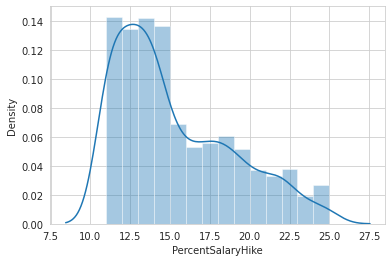

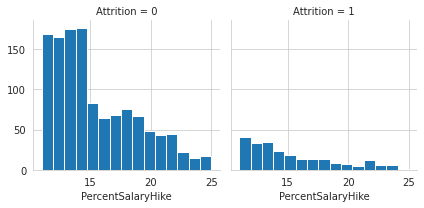

In [48]:
# Attrition plotted against Percent Salary Hike of employees. 
sns.distplot(data['PercentSalaryHike'])
sns.set_style('whitegrid')
g = sns.FacetGrid(data, col='Attrition')
g.map(plt.hist, 'PercentSalaryHike', bins=15)

In [49]:
# StockOptionLevel and Attrition
data[['StockOptionLevel', 'Attrition']].groupby(['StockOptionLevel'], as_index=False).mean().sort_values(by='Attrition', ascending=False)

,StockOptionLevel,Attrition
0,0,0.244057
3,3,0.176471
1,1,0.093960
2,2,0.075949


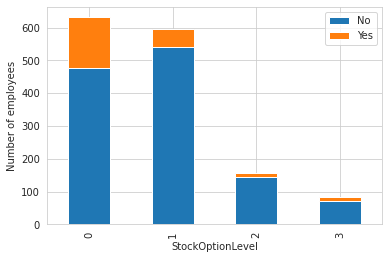

In [50]:
df= data.groupby(['StockOptionLevel','Attrition']).size().unstack()
df.plot(kind='bar', stacked=True)
plt.ylabel("Number of employees")
plt.legend(["No" , "Yes"])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


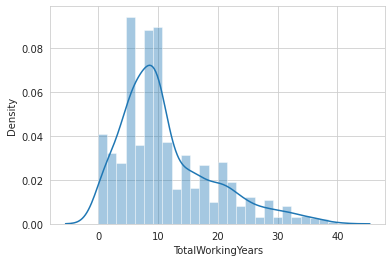

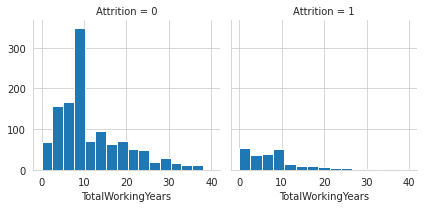

In [51]:
sns.distplot(data['TotalWorkingYears'])
sns.set_style('whitegrid')
g = sns.FacetGrid(data, col='Attrition')
g.map(plt.hist, 'TotalWorkingYears', bins=15)


In [52]:
# TrainingTimesLastYear and Attrition
data[['TrainingTimesLastYear', 'Attrition']].groupby(['TrainingTimesLastYear'], as_index=False).mean().sort_values(by='Attrition', ascending=False)

,TrainingTimesLastYear,Attrition
0,0,0.277778
4,4,0.211382
2,2,0.179159
3,3,0.140530
1,1,0.126761
5,5,0.117647
6,6,0.092308


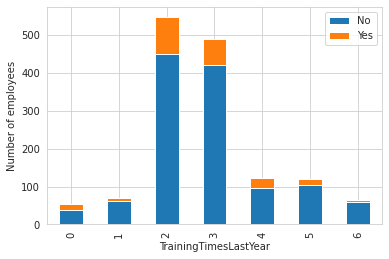

In [53]:
df= data.groupby(['TrainingTimesLastYear','Attrition']).size().unstack()
df.plot(kind='bar', stacked=True)
plt.ylabel("Number of employees")
plt.legend(["No" , "Yes"])
plt.show()

In [54]:
# WorkLifeBalance and Attrition
data[['WorkLifeBalance', 'Attrition']].groupby(['WorkLifeBalance'], as_index=False).mean().sort_values(by='Attrition', ascending=False)

,WorkLifeBalance,Attrition
0,1,0.312500
3,4,0.176471
1,2,0.168605
2,3,0.142217


In [55]:
data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EnvironmentSatisfaction', 'Gender',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'OverTime', 'PercentSalaryHike', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

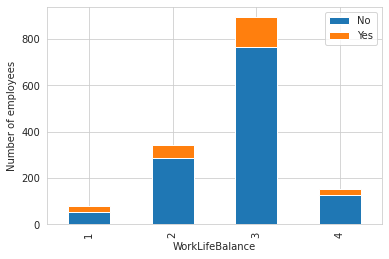

In [57]:
df= data.groupby(['WorkLifeBalance','Attrition']).size().unstack()
df.plot(kind='bar', stacked=True)
plt.ylabel("Number of employees")
plt.legend(["No" , "Yes"])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


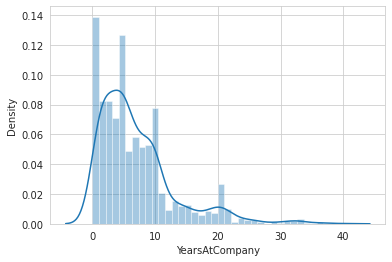

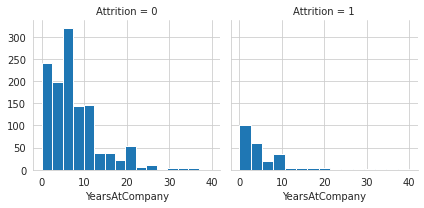

In [58]:
sns.distplot(data['YearsAtCompany'])
sns.set_style('whitegrid')
g = sns.FacetGrid(data, col='Attrition')
g.map(plt.hist, 'YearsAtCompany', bins=15)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


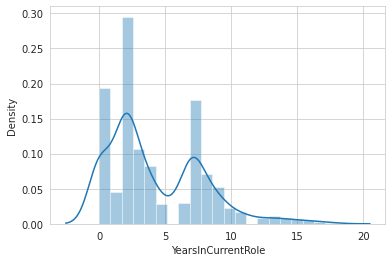

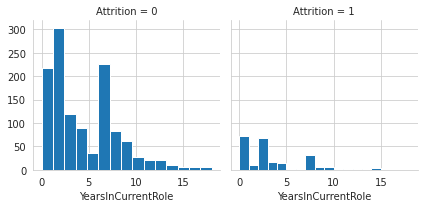

In [59]:
sns.distplot(data['YearsInCurrentRole'])
sns.set_style('whitegrid')
g = sns.FacetGrid(data, col='Attrition')
g.map(plt.hist, 'YearsInCurrentRole', bins=15)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


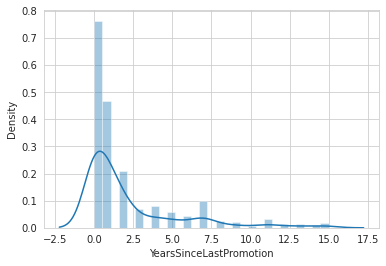

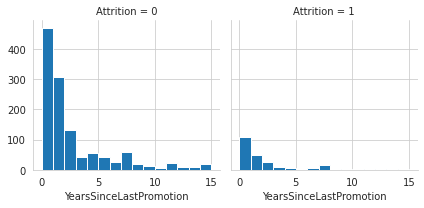

In [60]:
sns.distplot(data['YearsSinceLastPromotion'])
sns.set_style('whitegrid')
g = sns.FacetGrid(data, col='Attrition')
g.map(plt.hist, 'YearsSinceLastPromotion', bins=15)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


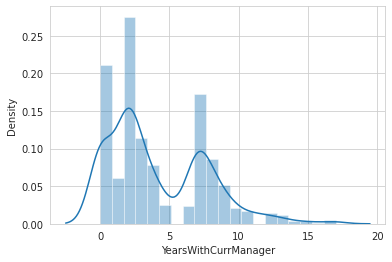

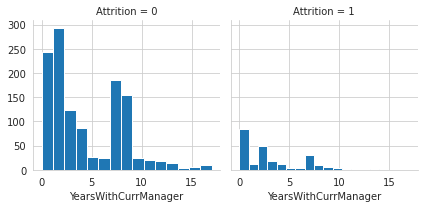

In [61]:
sns.distplot(data['YearsWithCurrManager'])
sns.set_style('whitegrid')
g = sns.FacetGrid(data, col='Attrition')
g.map(plt.hist, 'YearsWithCurrManager', bins=15)

# Predictive Analysis

In [62]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   int64 
 2   BusinessTravel            1470 non-null   object
 3   Department                1470 non-null   object
 4   DistanceFromHome          1470 non-null   int64 
 5   Education                 1470 non-null   int64 
 6   EducationField            1470 non-null   object
 7   EnvironmentSatisfaction   1470 non-null   int64 
 8   Gender                    1470 non-null   object
 9   JobInvolvement            1470 non-null   int64 
 10  JobLevel                  1470 non-null   int64 
 11  JobRole                   1470 non-null   object
 12  JobSatisfaction           1470 non-null   int64 
 13  MaritalStatus             1470 non-null   object
 14  MonthlyIncome           

In [92]:
# Encoding
from sklearn import preprocessing 

objList = data.select_dtypes(include = "object").columns
print (objList)

Index(['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole',
       'MaritalStatus', 'OverTime'],
      dtype='object')


In [93]:
#Label Encoding for object to numeric conversion
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for feat in objList:
    data[feat] = le.fit_transform(data[feat].astype(str))

print (data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Age                       1470 non-null   int64
 1   Attrition                 1470 non-null   int64
 2   BusinessTravel            1470 non-null   int64
 3   Department                1470 non-null   int64
 4   DistanceFromHome          1470 non-null   int64
 5   Education                 1470 non-null   int64
 6   EducationField            1470 non-null   int64
 7   EnvironmentSatisfaction   1470 non-null   int64
 8   Gender                    1470 non-null   int64
 9   JobInvolvement            1470 non-null   int64
 10  JobLevel                  1470 non-null   int64
 11  JobRole                   1470 non-null   int64
 12  JobSatisfaction           1470 non-null   int64
 13  MaritalStatus             1470 non-null   int64
 14  MonthlyIncome             1470 non-null 

In [94]:
data.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,...,PercentSalaryHike,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,2,1,2,1,2,0,3,...,11,1,0,8,0,1,6,4,0,5
1,49,0,1,1,8,1,1,3,1,2,...,23,4,1,10,3,3,10,7,1,7
2,37,1,2,1,2,2,4,4,1,2,...,15,2,0,7,3,3,0,0,0,0
3,33,0,1,1,3,4,1,4,0,3,...,11,3,0,8,3,3,8,7,3,0
4,27,0,2,1,2,1,3,1,1,3,...,12,4,1,6,3,3,2,2,2,2


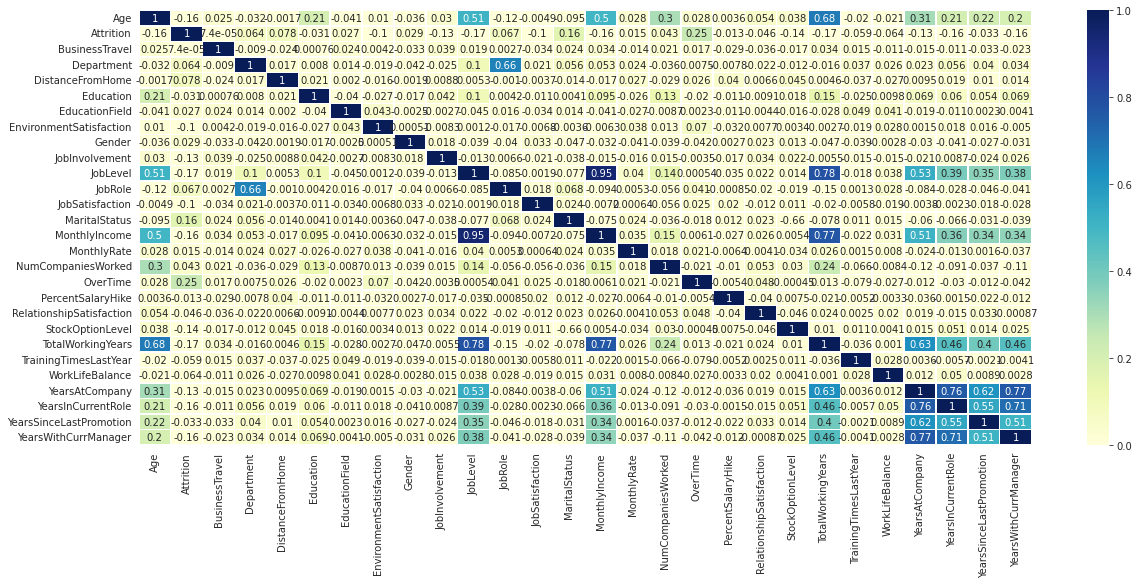

In [66]:
# Data Correlation
corrmatrix = data.corr()
plt.subplots(figsize=(20,8))
sns.heatmap(corrmatrix, vmin=0, vmax=1, annot=True, cmap='YlGnBu',linewidths=0.5)

In [95]:
#splitting data
x=data.drop('Attrition',axis=1)
y=data['Attrition']
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

Logistic Regression

In [96]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
LR= LogisticRegression()
LR.fit(x_train, y_train)
y_pred=LR.predict(x_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [97]:
from sklearn.metrics import accuracy_score
print('Accuracy for Logistic Regression', accuracy_score(y_test, y_pred))

Accuracy for Logistic Regression 0.854875283446712


In [70]:
# #using standard scaler
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# x_train=scaler.fit_transform(x_train)
# x_test=scaler.fit_transform(x_test)
# #x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
# LR= LogisticRegression()
# LR.fit(x_train, y_train)
# logy_pred=LR.predict(x_test)
# accuracy_score(y_test, logy_pred)

0.8684807256235828

In [98]:
#using normalisation
from sklearn.preprocessing import Normalizer
Norm=Normalizer()
x_train=Norm.fit_transform(x_train)
x_test=Norm.fit_transform(x_test)
LR= LogisticRegression()
LR.fit(x_train, y_train)
y_pred=LR.predict(x_test)
accuracy_score(y_test, y_pred)

0.8616780045351474

Random Forest

In [99]:
# Random forest algorithm
from sklearn.ensemble import RandomForestClassifier
randomf=RandomForestClassifier()
randomf.fit(x_train,y_train)
Ry_pred= randomf.predict(x_test)
print('Accuracy for Random Forest algorithm' ,accuracy_score(y_test, Ry_pred))

Accuracy for Random Forest algorithm 0.8571428571428571


In [100]:
#Xtream GradientBoosting
from xgboost import XGBClassifier
xgb=XGBClassifier()
xgb.fit(x_train,y_train)
Xgby_pred=xgb.predict(x_test)
print('Accuracy for XGB:',accuracy_score(y_test, Xgby_pred))


Accuracy for XGB: 0.8571428571428571


In [101]:
from sklearn.metrics import accuracy_score,precision_score,f1_score

In [104]:
#Log
log= accuracy_score(y_test, logy_pred)
prec1= precision_score(y_test, logy_pred)
logf1= f1_score(y_test,logy_pred)

#random
ran= accuracy_score(y_test, Ry_pred)
prec2= precision_score(y_test, Ry_pred)
ranf1= f1_score(y_test,Ry_pred)

#XGB
xgb= accuracy_score(y_test, Xgby_pred)
prec3= precision_score(y_test, Xgby_pred)
xgbf1= f1_score(y_test,Xgby_pred)
accu= [log,ran,xgb]
prec= [prec1,prec2,prec3]
f1 = [logf1, ranf1, xgbf1]
accu
prec
f1

[0.39583333333333337, 0.05970149253731344, 0.20253164556962025]

In [105]:
columns = ['LogisticR', 'Random Forest', 'XGBoost']
index = ['Accuracy','Precision','F1_score']
accuracy_df = pd.DataFrame([accu ,prec, f1], index = index, columns = columns)

accuracy_df1 = accuracy_df.transpose()
accuracy_df1.columns.name = 'Algorithm'
accuracy_df1

Algorithm,Accuracy,Precision,F1_score
LogisticR,0.868481,0.542857,0.395833
Random Forest,0.857143,0.333333,0.059701
XGBoost,0.857143,0.444444,0.202532


In [106]:
#Feature importance
pd.Series(randomf.feature_importances_,index=x.columns).sort_values(ascending=False)*100

OverTime                    7.381242
TotalWorkingYears           5.183099
MaritalStatus               5.167749
MonthlyIncome               4.388292
DistanceFromHome            4.224903
StockOptionLevel            4.151411
MonthlyRate                 4.135113
NumCompaniesWorked          3.880845
YearsAtCompany              3.845011
RelationshipSatisfaction    3.815219
JobSatisfaction             3.756813
Age                         3.734793
EnvironmentSatisfaction     3.660930
EducationField              3.659886
JobInvolvement              3.535862
WorkLifeBalance             3.383697
Department                  3.334174
TrainingTimesLastYear       3.233216
JobRole                     3.148378
YearsWithCurrManager        3.132939
JobLevel                    3.094031
Education                   3.092565
YearsInCurrentRole          3.088347
BusinessTravel              2.993632
PercentSalaryHike           2.875510
YearsSinceLastPromotion     2.114968
Gender                      1.987375
d